# 텐서플로 설치
- conda install tensorflow=1.14.0
- version 1점대랑 2점대랑 완전 다름
- 많이 쓰는 건 1점대 / 끝날 때 2점대 사용법 강의 예정

In [1]:
import tensorflow as tf
print(tf.__version__)

C:\Users\ICT01_21\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_21\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_21\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_21\Anaconda3\envs\tf_test\lib\site-packages

1.14.0


C:\Users\ICT01_21\Anaconda3\envs\tf_test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_21\Anaconda3\envs\tf_test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_21\Anaconda3\envs\tf_test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_21\Anaconda3\envs\tf_t

# 텐서플로
분산처리를 위해 만들어짐 (병렬처리, PC 분산)
 CPU는 부동소수점 연산 4~6개 / GPU는 1024개
 GPU 연산해서 CPU로 가져오자 (가장 먼저 한 얘가 CUDA, CUDNN)
 CPU - GPU 연결을 위해 session 개념이 생김
 변수 3가지 (constant 상수, variables 변수_가중치 저장, placeholder 주입변수)
 placeholder >> 미니배치 >> 지역해 문제 해결, 속도 빨라짐 (feeding >> for문이 들어감)
 que : 미니배치만큼 데이터를 만들어서 순차적으로 전달하기 위해 (비동기적 연산)
 https://bcho.tistory.com/1163 (큐 사용법과 구조)

 ## Graph
 신경망의 자료구조는 그래프
 node(계산기, operator) & edge(데이터를 주고받음, tensor가 처리)
 한 노드의 연산이 되려면 그 노드에 연결된 모든 노드의 연산이 완료되어야 함
 분산 처리가 가능 (동기화)
 https://gmlwjd9405.github.io/2018/08/13/data-structure-graph.html 그래프의 개념

# 안되는 사람들이 있어서 가상환경 구축
 conda create --name tf_test python=3.7 anaconda

 activate tf_test
 conda update pip
 conda install numpy, pandas, jupyter, scipy, scikit-image, seaborn
 conda install tensorflow=1.14.0
 jupyter kernel install

In [4]:
# 데이터 타입
import tensorflow as tf
hello = tf.constant('Hello, Tensorflow!')
sess = tf.Session()
print(hello) # tensorflow의 데이터는 직접 확인이 불가
print(sess.run(hello)) # numpy 데이터로 변경

Tensor("Const_2:0", shape=(), dtype=string)
b'Hello, Tensorflow!'


In [5]:
x = tf.constant(35, name='x')
# 모델의 그래프 구조 확인
# 모델을 그대로 저장(가중치)할 때 메모리 위치를 확인하기 위해서
y = tf.Variable(x + 5, name='y') # 변수가 있는 경우 반드시 초기화

print(y)

<tf.Variable 'y:0' shape=() dtype=int32_ref>


In [8]:
model = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(model)
    print(session.run(y))

40


In [9]:
a = tf.constant([1,2,3], name='a') # GPU 공간에 만든다(라고 이해합시다, 우린 아직 GPU안쓰지만, 애초에 태생이 그럼...)
b = tf.constant([4,5,6], name='b')
add_op = a + b # 요소끼리 계산 (배열연산)

with tf.Session() as session:
    print(session.run(add_op))

[5 7 9]


In [11]:
# Graph로 구성 - 골격 (구조) 형성
a = tf.placeholder(tf.int16) # 데이터없이 공간만 확보
b = tf.placeholder(tf.int16)
add = tf.add(a, b)
mul = tf.multiply(a, b)
total = tf.multiply(add, mul)

In [13]:
with tf.Session() as sess:
    print("feed 변수합 : %i" % sess.run(add, feed_dict={a:2, b:3}))
    print("feed 변수곱 : %i" % sess.run(mul, feed_dict={a:2, b:3}))
    print("fedd 변수곱 : %i" % sess.run(total, feed_dict={a:2, b:3}))

feed 변수합 : 5
feed 변수곱 : 6
fedd 변수곱 : 30


In [14]:
matrix1 = tf.constant([[3.,3.]]) # 1X2
matrix2 = tf.constant([[2.],[2.]]) # 2X1
product = tf.matmul(matrix1, matrix2) # matrix multiply

with tf.Session() as sess: # 실행부
    result = sess.run(product)
    print(result)

[[12.]]


In [18]:
zeros = tf.zeros([2,2])
ones = tf.ones([6])
uniform = tf.random_uniform([3,3,3], minval=0.0, maxval=10) # 균등분포
normal = tf.random_normal([3,3,3], mean=0.0, stddev=2.0) # 정규분포
trunc = tf.truncated_normal([2,2], mean=5.0, stddev=1.0) # 표준편차 2배수 내의 것으로 초기화
random_var = tf.Variable(tf.truncated_normal([2,2]))

In [29]:
init = tf.global_variables_initializer()
sess = tf.Session()
print(sess.run(trunc))
print(sess.run(normal))

[[3.3029752 4.016944 ]
 [4.2040854 4.783019 ]]
[[[-1.3711457  -1.8664842   0.40359268]
  [-0.7221369   0.67744493 -5.9628077 ]
  [ 3.1495752   0.9449355  -0.55545926]]

 [[-1.990816    2.228099    0.16372193]
  [-0.1112163   0.5823934  -3.923775  ]
  [-0.49034008  0.6647841  -0.5896291 ]]

 [[-4.81387    -0.7066935   0.5822279 ]
  [ 0.30384153  0.5525014  -0.01952812]
  [-0.18609092  0.4525759   2.8207479 ]]]


In [28]:
sess.run(init)
print(sess.run(random_var))

[[-0.20177734  0.5972559 ]
 [-1.7179797  -0.06077119]]


In [32]:
import tensorflow as tf
my_tensor = tf.constant(0, shape=[6,2])
my_static_shape = my_tensor.get_shape()
print(type(my_static_shape)) # class
print(my_static_shape) # 내용은 run으로, 차수는 get_shape 함수로 확인
my_tensor_transposed = tf.transpose(my_tensor)
print(my_tensor_transposed.get_shape())

<class 'tensorflow.python.framework.tensor_shape.TensorShape'>
(6, 2)
(2, 6)


In [34]:
import tensorflow as tf
tf.InteractiveSession() # 대화형 세션
tf.zeros(2)
a = tf.zeros(2)
print(a.eval())

[0. 0.]


In [35]:
def showvalue(t):
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run() # chainning
    print(t.eval())
    sess.close()

In [36]:
c2, c3 = tf.constant([1.2, 5.6]), tf.constant([-4, -1, 7])
v2, v3 = tf.Variable([2.3, 4.5]), tf.Variable([-2, 3, 5])
showvalue(tf.add_n([c2, v2])) 
showvalue(tf.add_n([c3, v3, v3])) # 여러개를 더할 수 있도록

[ 3.5 10.1]
[-8  5 17]


C:\Users\ICT01_21\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\client\session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
# 2x + y + z = 1
# 4x + 3y + 4z = 2
# -4x + 2y + 2z = -6

In [45]:
sess = tf.Session()
x = tf.constant([2.0, 1.0, 1.0, 4, 3, 4, -4, 2, 2], shape=[3,3])
print(sess.run(x))
y = tf.constant([1.0, 2, -6], shape=[3,1])
print(sess.run(y))

[[ 2.  1.  1.]
 [ 4.  3.  4.]
 [-4.  2.  2.]]
[[ 1.]
 [ 2.]
 [-6.]]


In [46]:
z = tf.matrix_solve(x, y )
result = sess.run(z)
print("계수:", result)
print(sess.run(z))

계수: [[ 1.0000001]
 [-2.0000002]
 [ 1.0000001]]
[[ 1.0000001]
 [-2.0000002]
 [ 1.0000001]]


In [51]:
print(2.0*result[0] + 1.0*result[1]+1.0*result[2])
print(sess.run(tf.matmul(x, z)))

[1.0000001]
[[ 1.0000001]
 [ 2.       ]
 [-6.000001 ]]


In [53]:
x_1 = tf.matrix_inverse(x)
z = tf.matmul(x_1, y)
print("해:", sess.run(z))

해: [[ 1.0000002]
 [-2.0000005]
 [ 1.0000002]]


In [55]:
# 특이행렬분해 (singular value decomposition)
#https://darkpgmr.tistory.com/106
a = tf.constant([1,2,3,4,5,6], shape=[2,3])
a = tf.to_float(a)
s, u, v = tf.svd(a) # s(1,2), u(2,2), v(3,2)
print(sess.run(s))
print(sess.run(u))
print(sess.run(v))


[9.508034   0.77286935]
[[-0.38631773 -0.92236584]
 [-0.92236584  0.38631773]]
[[-0.42866713  0.8059641 ]
 [-0.56630695  0.1123824 ]
 [-0.70394677 -0.58119917]]


In [57]:
diagonal = [1,2,3,4]
dia = tf.diag(diagonal) # 대각행렬 : one-hot-encoding
print(sess.run(dia))

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [58]:
print(sess.run(tf.diag_part(dia)))
print(sess.run(tf.trace(dia)))

[1 2 3 4]
10


In [59]:
import numpy as np
a = tf.constant([1,2,3,4,5,6], shape=[2,3])
b = tf.constant([7,8,9,10,11,12], shape=[3,2])
c = tf.matmul(a,b)
sess.run(c)

array([[ 58,  64],
       [139, 154]])

In [65]:
a = tf.constant(np.arange(1, 25, dtype=np.int32), shape=[2,2,2,3]) # 행렬 중심 데이터 표현
print(sess.run(a))
b = tf.constant(np.arange(25, 49, dtype=np.int32), shape=[2,2,3,2])
print(sess.run(b))
c = tf.matmul(a,b)
sess.run(c)

[[[[ 1  2  3]
   [ 4  5  6]]

  [[ 7  8  9]
   [10 11 12]]]


 [[[13 14 15]
   [16 17 18]]

  [[19 20 21]
   [22 23 24]]]]
[[[[25 26]
   [27 28]
   [29 30]]

  [[31 32]
   [33 34]
   [35 36]]]


 [[[37 38]
   [39 40]
   [41 42]]

  [[43 44]
   [45 46]
   [47 48]]]]


array([[[[ 166,  172],
         [ 409,  424]],

        [[ 796,  820],
         [1093, 1126]]],


       [[[1642, 1684],
         [1993, 2044]],

        [[2704, 2764],
         [3109, 3178]]]])

In [66]:
# a를 제곱한다면 : 자기자신을 제곱하려면 전치
d = tf.matmul(a, tf.transpose(a, perm=[0,1,3,2]))
print(sess.run(d))
tf.matmul(a, a, transpose_b=True)

[[[[  14   32]
   [  32   77]]

  [[ 194  266]
   [ 266  365]]]


 [[[ 590  716]
   [ 716  869]]

  [[1202 1382]
   [1382 1589]]]]


<tf.Tensor 'MatMul_10:0' shape=(2, 2, 2, 2) dtype=int32>

In [68]:
x = tf.constant([[[1,2,3], [4,5,6]],[[7,8,9],[10,11,12]]])
print(sess.run(tf.shape(x)))
sess.run(tf.transpose(x))

[2 2 3]


array([[[ 1,  7],
        [ 4, 10]],

       [[ 2,  8],
        [ 5, 11]],

       [[ 3,  9],
        [ 6, 12]]])

In [70]:
y = tf.transpose(x, perm=[0,2,1])
sess.run(tf.shape(x))
sess.run(y)

array([[[ 1,  4],
        [ 2,  5],
        [ 3,  6]],

       [[ 7, 10],
        [ 8, 11],
        [ 9, 12]]])

In [72]:
sess.run(tf.matmul(x, tf.transpose(x, perm=[0,2,1])))

array([[[ 14,  32],
        [ 32,  77]],

       [[194, 266],
        [266, 365]]])

In [81]:
t = [1,2,3,4,5,6]
t = tf.reshape(t, [1,2,1,3,1,1]) # 6차원으로 만들쟈
sess.run(t)

array([[[[[[1]],

          [[2]],

          [[3]]]],



        [[[[4]],

          [[5]],

          [[6]]]]]])

In [82]:
print("t의 차원은", sess.run(tf.shape(t)))

t의 차원은 [1 2 1 3 1 1]


In [83]:
print("차원의 수를 축소할 때", sess.run(tf.shape(tf.squeeze(t))))

차원의 수를 축소할 때 [2 3]


In [84]:
tensor = [1,2,3,4,5,6,7,8,9,10,11,12]
print(sess.run(tf.reshape(tensor, [2,-1])))
tf.reshape(tensor, [-1, 6])
print(sess.run(tf.reshape(tensor, [2,-1,3])))

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [85]:
print(tf.expand_dims(t,0)) # 차원 확대

Tensor("ExpandDims:0", shape=(1, 1, 2, 1, 3, 1, 1), dtype=int32)


In [86]:
t = [[1,2,3], [4,5,6]]
paddings = [[1,1],[2,2]] # 행을 위에 하나, 아래 하나 / 열을 왼쪽 두개, 오른쪽 두개 추가해랑
print(sess.run(tf.pad(t, paddings, "CONSTANT")))

[[0 0 0 0 0 0 0]
 [0 0 1 2 3 0 0]
 [0 0 4 5 6 0 0]
 [0 0 0 0 0 0 0]]


In [87]:
# 수를 채우는 방법
paddings = [[1,1,], [1,1]]
print(sess.run(tf.pad(t, paddings, "REFLECT")))

[[5 4 5 6 5]
 [2 1 2 3 2]
 [5 4 5 6 5]
 [2 1 2 3 2]]


In [88]:
print(sess.run(tf.pad(t, paddings, "SYMMETRIC")))

[[1 1 2 3 3]
 [1 1 2 3 3]
 [4 4 5 6 6]
 [4 4 5 6 6]]


In [ ]:
# 다차 방정식의 해
- 무작위 대입법
- 역행렬을 구함
- 입출력 데이터만 있음 : 계수 결정해야 함 (가중치 학습을 통해서 학습)

In [3]:
# 데이터로부터 규칙을 발견 => 분류와 예측을 하기 위해서
import numpy as np
import tensorflow as tf
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3
len(y_data)

C:\Users\ICT01_21\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_21\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_21\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_21\Anaconda3\envs\tf_test\lib\site-packages

100

In [4]:
# 가중치와 바이어스
# 가중치는 설명력
# 바이어스는 activation 결정 (값을 활성화)  


W = tf.Variable(tf.random_uniform([1], -1.0, 1.0)) # 균등분포로 가중치 초기화
b = tf.Variable(tf.zeros([1])) # 바이어스
sess = tf.Session()
y = W * x_data + b

In [5]:
loss = tf.reduce_mean(tf.square(y - y_data)) # loss function : mse
# 경사하강법 (기울기 : 미분을 이용하여 _ 기울기가 -면 가중치에 더해주고, +면 가중치에 감해주는 연산을 통해 최적점 찾음)
optimizer = tf.train.GradientDescentOptimizer(0.5) # learning rate (학습률)
train = optimizer.minimize(loss) # 최적화

In [6]:
init = tf.global_variables_initializer()
sess.run(init)

In [7]:
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))

0 [0.68609023] [-0.02251602]
20 [0.2511486] [0.21988896]
40 [0.13865602] [0.27951175]
60 [0.10988621] [0.29476017]
80 [0.10252839] [0.29865992]
100 [0.10064663] [0.2996573]
120 [0.10016539] [0.29991236]
140 [0.1000423] [0.2999776]
160 [0.10001082] [0.2999943]
180 [0.10000277] [0.29999855]
200 [0.10000069] [0.29999965]


In [97]:
print(sess.run(W))

[-0.28244424]


In [12]:
# 주입변수로 주입
x = tf.placeholder(tf.float32, name='x')
y = tf.placeholder(tf.float32)

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
sess = tf.Session()
y_model = W * x + b

loss = tf.reduce_mean(tf.square(y_model - y))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
sess.run(init)

for step in range(201):
    sess.run(train, {x:x_data, y:y_data})
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))

0 [0.4771057] [0.13152021]
20 [0.19312212] [0.25064388]
40 [0.12381582] [0.28737727]
60 [0.10609087] [0.29677176]
80 [0.10155773] [0.2991744]
100 [0.1003984] [0.29978886]
120 [0.1001019] [0.299946]
140 [0.10002605] [0.2999862]
160 [0.10000666] [0.2999965]
180 [0.10000168] [0.29999912]
200 [0.10000043] [0.29999977]


In [10]:
predicted = sess.run(y_model, {x: [i for i in range(100)]})

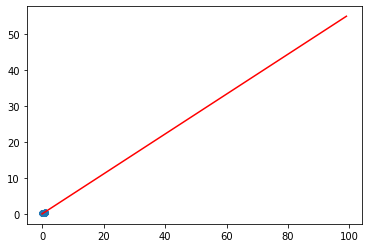

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'o', markersize=5)
plt.plot(predicted, 'r')
plt.show()

In [13]:
from tensorflow.python.framework import ops
import os
ops.reset_default_graph()

In [14]:
sess = tf.Session()
x_vals = np.array([1.,3.,5.,7.,9.])
y_vals = np.array([1.,3.,5.,7.,9.])
x_data = tf.placeholder(tf.float32)
y_data = tf.placeholder(tf.float32)
m = tf.constant(3.)
prod = tf.multiply(x_data, y_data)
for x_val in x_vals:
    print(sess.run(prod, feed_dict={x_data:x_val, y_data:y_vals}))

[1. 3. 5. 7. 9.]
[ 3.  9. 15. 21. 27.]
[ 5. 15. 25. 35. 45.]
[ 7. 21. 35. 49. 63.]
[ 9. 27. 45. 63. 81.]


In [15]:
merged = tf.summary.merge_all()
if not os.path.exists('c://tmp/tensorboard_logs/'):
    os.makedirs('c://tmp/tensorboard_logs/')
my_writer = tf.summary.FileWriter('c://tmp/tensorboard_logs/', sess.graph)

In [16]:
# 프롬프트에 tensorboard --logdir=/tmp


In [21]:
import numpy
rng = numpy.random

learning_rate = 0.01
training_epochs = 4000
display_step = 50

train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,
                         10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,
                         3.465,1.65,2.904,2.42,2.94,1.3])

In [22]:
# 행 _ data point 관측치
# 열 _ 변수개수
n_samples = train_X.shape[0]
X = tf.placeholder("float")
Y = tf.placeholder("float")
W = tf.Variable(rng.randn(), name='weight')
b = tf.Variable(rng.randn(), name='bias')
activation = tf.add(tf.multiply(X, W), b)
cost = tf.reduce_sum(tf.pow(activation-Y, 2))/(2*n_samples)
# 역전파 : optimizer도 hyperparameter
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()

Epoch: 0001 cost= 0.081714854 W= 0.29241064 b= 0.5662048
Epoch: 0051 cost= 0.080014549 W= 0.2805362 b= 0.5788677
Epoch: 0101 cost= 0.079662941 W= 0.2786957 b= 0.5921083
Epoch: 0151 cost= 0.079352073 W= 0.27696455 b= 0.6045617
Epoch: 0201 cost= 0.079077259 W= 0.27533653 b= 0.6162733
Epoch: 0251 cost= 0.078834303 W= 0.27380568 b= 0.6272867
Epoch: 0301 cost= 0.078619540 W= 0.27236578 b= 0.6376448
Epoch: 0351 cost= 0.078429669 W= 0.2710115 b= 0.6473873
Epoch: 0401 cost= 0.078261830 W= 0.2697379 b= 0.6565501
Epoch: 0451 cost= 0.078113474 W= 0.2685399 b= 0.6651683
Epoch: 0501 cost= 0.077982314 W= 0.26741308 b= 0.6732743
Epoch: 0551 cost= 0.077866390 W= 0.2663533 b= 0.6808984
Epoch: 0601 cost= 0.077763945 W= 0.26535657 b= 0.68806833
Epoch: 0651 cost= 0.077673405 W= 0.26441905 b= 0.69481266
Epoch: 0701 cost= 0.077593386 W= 0.26353738 b= 0.70115554
Epoch: 0751 cost= 0.077522665 W= 0.26270813 b= 0.7071215
Epoch: 0801 cost= 0.077460207 W= 0.2619281 b= 0.71273285
Epoch: 0851 cost= 0.077404976 W= 0

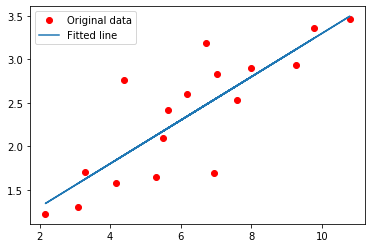

In [24]:
# 이 위까지 한 게 ~ 그래프 정의 : node(연산) + edge(데이터 전달 : tensor(배열+행렬))
# 전제조건 : GPU가 존재 => 네트워크로 연결
with tf.Session() as sess: # 실행부
    sess.run(init)
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
# 비용함수 : 감소 (우하향)
# accuracy : 증가 (우상향)
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=",
                 "{:.9f}".format(sess.run(cost, feed_dict={
                     X: train_X, Y: train_Y})),
                 "W=", sess.run(W), "b=", sess.run(b))
    print("최적화 종료")
    print("cost=", sess.run(cost, feed_dict={X: train_X, Y:train_Y}),
         "W=", sess.run(W), 'b=', sess.run(b))
    plt.plot(train_X, train_Y, 'ro', label="Original data")
    plt.plot(train_X, sess.run(W)*train_X + sess.run(b),
            label = 'Fitted line')
    plt.legend()
    plt.show()

In [27]:
# tensor -> 직접 시각화하는 것이 불가능 -> numpy 포멧으로 변경
import tensorflow as tf
def run_variable(variable):
    tf.global_variables_initializer()
    with tf.Session() as sess:
        return sess.run(variable)
    
my_distribution = tf.random_uniform((600,400), seed=42) # 24개 데이터
uniform = run_variable(my_distribution)

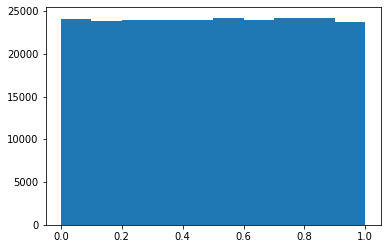

In [28]:
from matplotlib import pyplot as plt
plt.hist(uniform.flatten()) # 데이터 메모리 저장 : 1차원
plt.show()

In [ ]:
# activation 함수 : 활성화 함수 >> 회귀냐 분류냐를 결정
- 비선형 매핑 (선형대수 -> 비선형 문제로 변경)
- 가중치를 깊게하고 활성화함수 매핑으로 XOR 문제를 해결

In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
ops.reset_default_graph() # 그래프 초기화
sess = tf.Session()

x_vals = np.linspace(start=-10., stop=10, num=100)
print(x_vals)

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

[ 0.  3. 10.]
[0.26894143 0.5        0.7310586 ]
[-0.7615942  0.         0.7615942]
[0.31326166 0.6931472  1.3132616 ]
[-0.9999546  -0.99994444 -0.999932   -0.99991677 -0.99989814 -0.99987534
 -0.99984743 -0.99981327 -0.99977147 -0.99972031 -0.99965769 -0.99958106
 -0.99948727 -0.99937248 -0.999232   -0.99906006 -0.99884964 -0.9985921
 -0.99827691 -0.99789116 -0.99741905 -0.99684124 -0.99613408 -0.99526861
 -0.99420938 -0.99291301 -0.99132643 -0.98938465 -0.98700817 -0.98409965
 -0.98053999 -0.97618343 -0.97085155 -0.96432601 -0.95633957 -0.94656519
 -0.9346026  -0.9199619  -0.90204355 -0.88011378 -0.85327452 -0.82042669
 -0.78022512 -0.73102351 -0.67080701 -0.59710968 -0.50691352 -0.3965249
 -0.26142329 -0.0960761   0.1010101   0.3030303   0.50505051  0.70707071
  0.90909091  1.11111111  1.31313131  1.51515152  1.71717172  1.91919192
  2.12121212  2.32323232  2.52525253  2.72727273  2.92929293  3.13131313
  3.33333333  3.53535354  3.73737374  3.93939394  4.14141414  4.34343434
  4.545

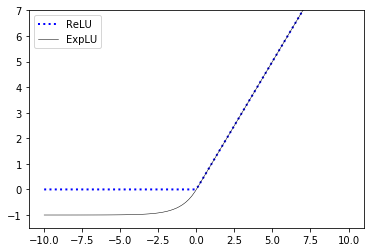

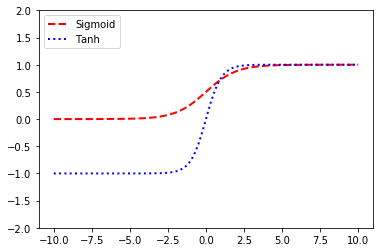

In [34]:
print(sess.run(tf.nn.relu([-3., 3., 10.]))) # 0~무한대
y_relu = sess.run(tf.nn.relu(x_vals))
print(sess.run(tf.nn.sigmoid([-1., 0., 1. ]))) # 0~1
y_sigmoid = sess.run(tf.nn.sigmoid(x_vals))
print(sess.run(tf.nn.tanh([-1., 0., 1.]))) # -1~1
y_tanh = sess.run(tf.nn.tanh(x_vals))
print(sess.run(tf.nn.softplus([-1.,0.,1.]))) # 각진 단점 보완
y_sotfplus = sess.run(tf.nn.softplus(x_vals))
print(sess.run(tf.nn.elu(x_vals))) # -1~무한대 (relu의 수정본)
y_elu = sess.run(tf.nn.elu(x_vals))
print(y_elu)
plt.plot(x_vals, y_relu, 'b:', label='ReLU', linewidth=2)
plt.plot(x_vals, y_elu, 'k-', label='ExpLU', linewidth=0.5)
plt.ylim([-1.5, 7])
plt.legend(loc='upper left')
plt.show()
plt.plot(x_vals, y_sigmoid, 'r--', label='Sigmoid', linewidth=2)
plt.plot(x_vals, y_tanh, 'b:', label='Tanh', linewidth=2)
plt.ylim([-2,2])
plt.legend(loc='upper left')
plt.show()

In [47]:
ops.reset_default_graph()
sess = tf.Session()
tf.set_random_seed(5)
np.random.seed(42)
batch_size = 50
a1 = tf.Variable(tf.random_normal(shape=[1,1])) # 가중치
b1 = tf.Variable(tf.random_uniform(shape=[1,1])) # 바이어스
a2 = tf.Variable(tf.random_normal(shape=[1,1]))
b2 = tf.Variable(tf.random_uniform(shape=[1,1]))
x = np.random.normal(2, 0.1, 500)
# 사이즈 fix하지 않고 입력 데이터로부터 계산 / 행 데이터로 생성
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [48]:
sigmoid_activation = tf.sigmoid(tf.add(tf.matmul(x_data, a1), b1))
relu_activation = tf.nn.relu(tf.add(tf.matmul(x_data, a2), b2))
loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_activation, 0.75)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_activation, 0.75)))
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step_sigmoid = my_opt.minimize(loss1)
train_step_relu = my_opt.minimize(loss2)
print('\n Sigmoid And Relu 함수의 최적화 0.75')


 Sigmoid And Relu 함수의 최적화 0.75


In [49]:
loss_vec_sigmoid = []
loss_vec_relu = []

for i in range(500):
    rand_indices = np.random.choice(len(x), size=batch_size)
    x_vals = np.transpose([x[rand_indices]])
    sess.run(train_step_sigmoid, feed_dict={x_data: x_vals})
    sess.run(train_step_relu, feed_dict={x_data : x_vals})
    loss_vec_sigmoid.append(sess.run(loss1, feed_dict={x_data:x_vals}))
    loss_vec_relu.append(sess.run(loss2, feed_dict={x_data:x_vals}))
    sigmoid_output = np.mean(sess.run(sigmoid_activation, feed_dict={x_data: x_vals}))
    relu_output = np.mean(sess.run(relu_activation, feed_dict={x_data: x_vals}))
    if i % 50 == 0:
        print('sigmoid = ' + str(np.mean(sigmoid_output)) + 
             'relu = ' + str(np.mean(relu_output)))

sigmoid = 0.12655206relu = 2.0227606
sigmoid = 0.17863758relu = 0.7530296
sigmoid = 0.24769813relu = 0.7492897
sigmoid = 0.3446748relu = 0.7499546
sigmoid = 0.4400661relu = 0.7539999
sigmoid = 0.5236898relu = 0.754772
sigmoid = 0.58373857relu = 0.7508698
sigmoid = 0.62733483relu = 0.7470234
sigmoid = 0.6549499relu = 0.75180537
sigmoid = 0.67452586relu = 0.75470716


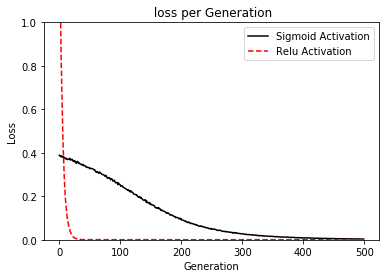

In [50]:
plt.plot(loss_vec_sigmoid, 'k-', label='Sigmoid Activation')
plt.plot(loss_vec_relu, 'r--', label='Relu Activation')
plt.ylim([0, 1.0])
plt.title(' loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show() 